In [1]:
# get methods from py-file in other directory
from modules.data_exploration.data_ex import import_data
from modules.build_ml_models.KNN_classification import KNN_classification


In [2]:
data = import_data('data/churn.csv')
display(data)

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
0,16,128,415,2845,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,2301,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,1616,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,2510,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,155,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,11,50,408,2000,0,1,40,235.7,127,40.07,...,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0
4996,49,152,415,394,0,0,0,184.2,90,31.31,...,73,21.83,213.6,113,9.61,14.7,2,3.97,3,1
4997,7,61,415,313,0,0,0,140.6,89,23.90,...,128,14.69,212.4,97,9.56,13.6,4,3.67,1,0
4998,7,109,510,3471,0,0,0,188.8,67,32.10,...,92,14.59,224.4,89,10.10,8.5,6,2.30,0,0


In [3]:
y_column = 'class'

In [4]:
from sklearn.model_selection import train_test_split
X = data.drop([y_column], axis=1)
y = data[y_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.800)

In [5]:
my_classification = KNN_classification()

KNN Classification created


In [6]:
print(my_classification.KNNmodel)

KNeighborsClassifier()


In [7]:
my_classification.set_train(X_train, y_train)
my_classification.set_test(X_test, y_test)
my_classification.fit()
my_classification.predict()


In [8]:
print(my_classification.get_test_accuracy())

0.844


In [9]:
print(my_classification.get_cross_validation_accuracy())

0.8612500000000001


In [10]:
data['class'].value_counts()

0    4293
1     707
Name: class, dtype: int64

Square-root of number of datasets: 63
Best Score: 0.86875
Best k: 10
Best Weights: distance


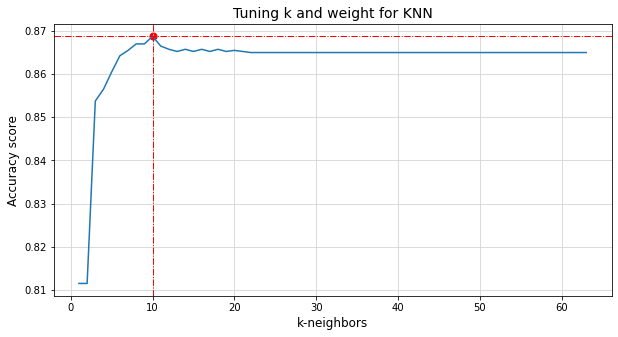

0.848


In [11]:
my_classification.tune_parameters()
my_classification.print_tuning_results()
my_classification.plot_tuning_k_results()
print(my_classification.get_test_accuracy())

Predicted Label,churn,no churn
True Label,,
churn,0.998800,0.001200
no churn,0.904192,0.095808


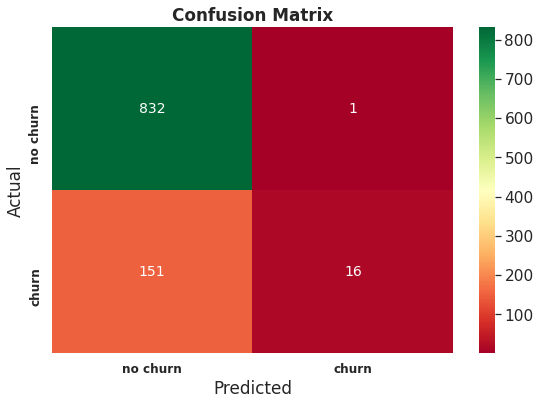

In [12]:
my_classification.plot_confusion_matrix()

The KNN predicts most of the time "no churn" an the accuracy corresponds to the occurance of "no churn in the data. For no churn the result is impressive but for churn there is no real benefit since approx 90% of the churn is not detected. 
So KNN can be seen more as a contant output than a real prediction but a kind of constant output

20